In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


In [11]:
# Loading the data
car = pd.read_csv('Car_preproccesed.csv')
car.head()


,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [15]:
# Separate continuous and categorical features
continuous_features = ['Mileage', 'EngineV']
categorical_features = [col for col in car.columns if col not in continuous_features + ['log_price']]

# Declare the feature and target variable
X = car.drop('log_price', axis=1)
y = car['log_price']

X.shape, y.shape


((3867, 17), (3867,))

In [17]:
from sklearn.preprocessing import StandardScaler

# Create instance of scaler
scaler = StandardScaler()

# Scaling the continuous features
X[continuous_features] = scaler.fit_transform(X[continuous_features])

X.head()


,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,1.217908,-0.474525,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,2.786602,0.473599,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2.065003,2.685886,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0.830963,1.843110,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,-0.423992,-0.474525,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((3093, 17), (3093,), (774, 17), (774,))

In [21]:
from sklearn.linear_model import LinearRegression

# Create instance of model
reg = LinearRegression()

# Fit the data
model = reg.fit(X_train, y_train)


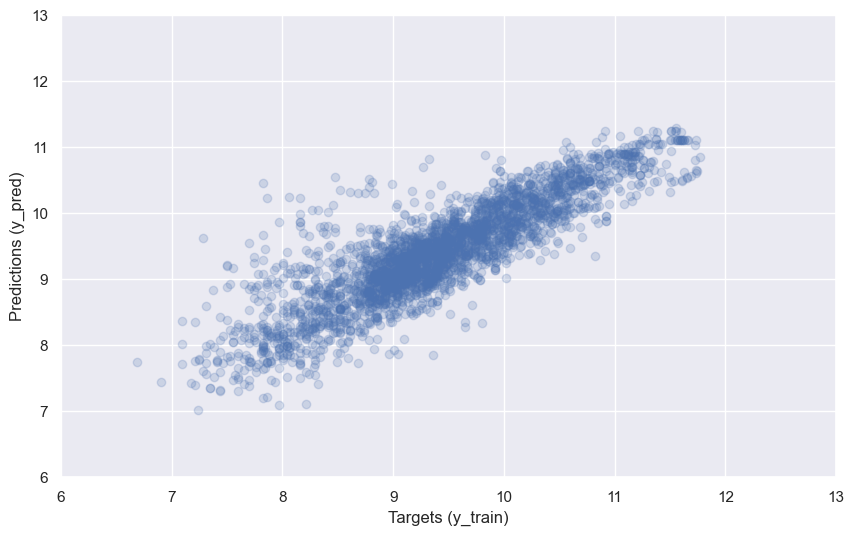

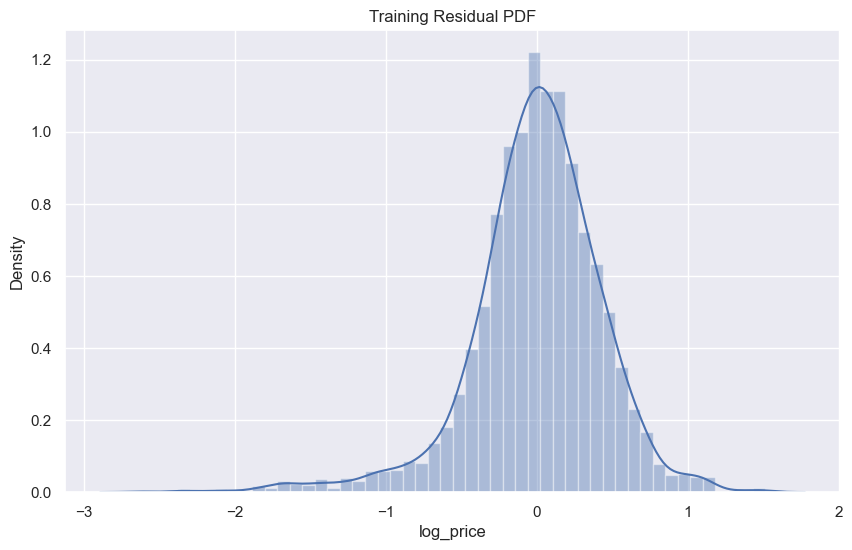

10165.941028678884

In [23]:
# Check the prediction with the original values
y_pred_train = reg.predict(X_train)
plt.figure(figsize=(10,6))
plt.scatter(y_train, y_pred_train, alpha=0.2)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

# Plotting the distribution of the residual
residual_train = (y_train - y_pred_train)
plt.figure(figsize=(10,6))
sns.distplot(residual_train)
plt.title('Training Residual PDF')
plt.show()

# Checking the r2_score
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

# Checking the RMSE
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_train)))


In [25]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary


,Features,Weights
0,Mileage,-0.462515
1,EngineV,0.213625
2,Brand_BMW,0.068152
3,Brand_Mercedes-Benz,0.059108
4,Brand_Mitsubishi,-0.478100
5,Brand_Renault,-0.553250
6,Brand_Toyota,-0.143937
7,Brand_Volkswagen,-0.186665
8,Body_hatch,-0.597673
9,Body_other,-0.350297


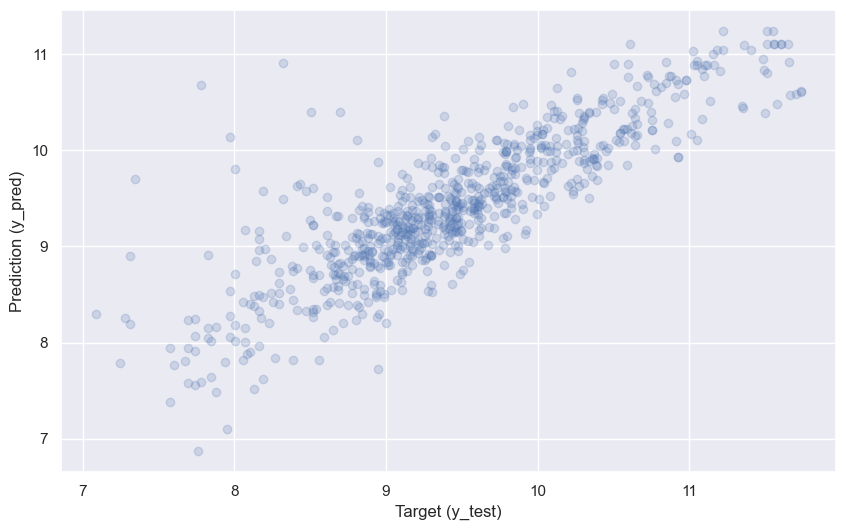

,Prediction,Target,Residual,Difference%
411,22477.27,22500.00,22.73,0.10
633,12913.53,12900.00,-13.53,0.10
437,10818.26,10800.00,-18.26,0.17
522,23245.83,23200.00,-45.83,0.20
91,11525.19,11500.00,-25.19,0.22
589,7028.32,6999.00,-29.32,0.42
664,61761.13,61500.00,-261.13,0.42
446,9252.34,9200.00,-52.34,0.57
322,9239.70,9300.00,60.30,0.65
119,14901.42,15000.00,98.58,0.66


In [27]:
# Predict on test data
y_pred = reg.predict(X_test)

# Plotting the graph
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel('Target (y_test)')
plt.ylabel('Prediction (y_pred)')
plt.show()

# Checking the RMSE on test data
np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

# Creating a dataframe to compare the result and prediction
df_eval = pd.DataFrame(np.exp(y_pred), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_eval['Target'] = np.exp(y_test)

# Calculate residuals and difference percentage
df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Target'] * 100)

# Check the performance data
df_eval.describe()

# Display all values
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_eval.sort_values(by=['Difference%'])


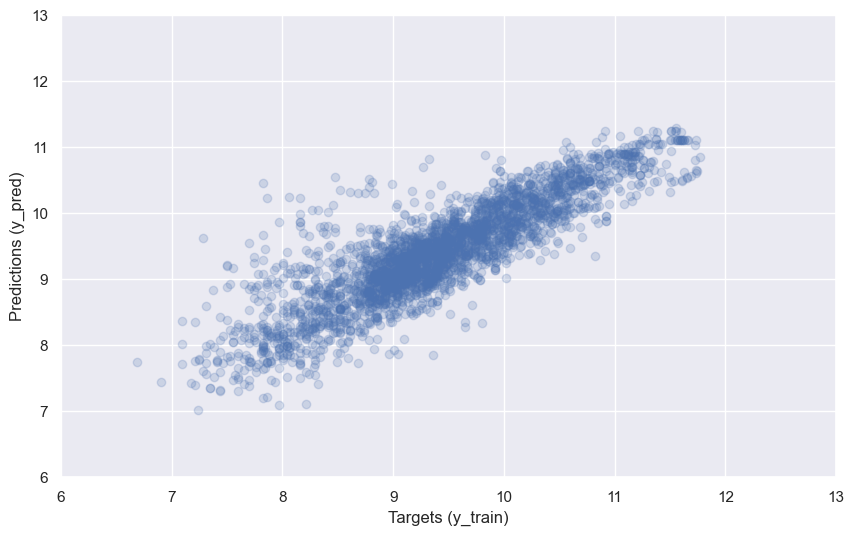

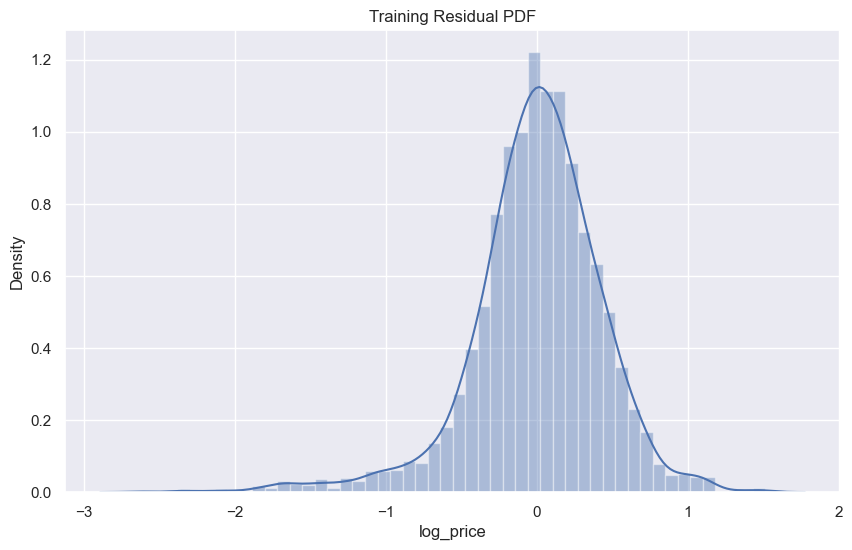

R2 Score on Training Data: 0.7572893585761237
RMSE on Training Data: 10165.941028678884


In [29]:
# Check the prediction with the original values
y_pred_train = reg.predict(X_train)

# Plotting the scatter plot of actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_train, y_pred_train, alpha=0.2)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_pred)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

# Plotting the distribution of the residual
residual_train = (y_train - y_pred_train)
plt.figure(figsize=(10,6))
sns.distplot(residual_train)
plt.title('Training Residual PDF')
plt.show()

# Checking the r2_score
r2_train = r2_score(y_train, y_pred_train)
print(f'R2 Score on Training Data: {r2_train}')

# Checking the RMSE
rmse_train = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_train)))
print(f'RMSE on Training Data: {rmse_train}')


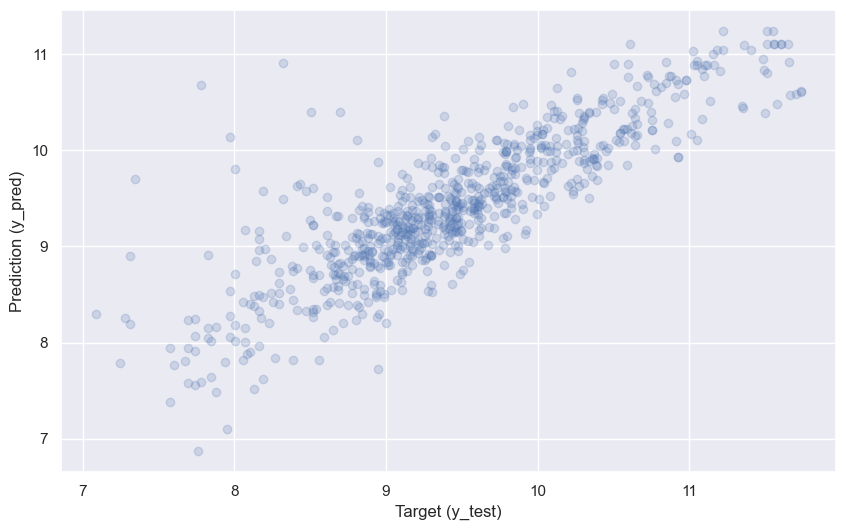

RMSE on Testing Data: 11692.288211748451
       Prediction    Target  Residual  Difference%
count      774.00    774.00    774.00       774.00
mean     16194.85  18602.02   2407.17        39.11
std      13265.84  20139.56  11449.21        97.37
min        964.00   1200.00 -50811.55         0.10
25%       7763.59   7500.00  -1827.31        11.63
50%      11715.38  11900.00    499.37        23.00
75%      20275.68  20999.06   3512.48        39.07
max      76339.58 125000.00  84484.67      1715.17
     Prediction    Target  Residual  Difference%
411    22477.27  22500.00     22.73         0.10
633    12913.53  12900.00    -13.53         0.10
437    10818.26  10800.00    -18.26         0.17
522    23245.83  23200.00    -45.83         0.20
91     11525.19  11500.00    -25.19         0.22
589     7028.32   6999.00    -29.32         0.42
664    61761.13  61500.00   -261.13         0.42
446     9252.34   9200.00    -52.34         0.57
322     9239.70   9300.00     60.30         0.65
119    149

In [31]:
# Predict on test data
y_pred = reg.predict(X_test)

# Plotting the scatter plot of actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel('Target (y_test)')
plt.ylabel('Prediction (y_pred)')
plt.show()

# Checking the RMSE on test data
rmse_test = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))
print(f'RMSE on Testing Data: {rmse_test}')

# Creating a dataframe to compare the result and prediction
df_eval = pd.DataFrame(np.exp(y_pred), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_eval['Target'] = np.exp(y_test)

# Calculate residuals and difference percentage
df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Target'] * 100)

# Check the performance data
print(df_eval.describe())

# Display all values
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(df_eval.sort_values(by=['Difference%']))


In [33]:
# Summary of metrics
metrics = {
    'R2 Score on Training Data': r2_train,
    'RMSE on Training Data': rmse_train,
    'RMSE on Testing Data': rmse_test
}

print(metrics)


{'R2 Score on Training Data': 0.7572893585761237, 'RMSE on Training Data': 10165.941028678884, 'RMSE on Testing Data': 11692.288211748451}


In [55]:
from sklearn.linear_model import LinearRegression

# Create and train the Linear Regression model
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

# Predict on training and testing data
y_pred_train_lr = lr_reg.predict(X_train)
y_pred_test_lr = lr_reg.predict(X_test)

# Evaluate the model
r2_train_lr = r2_score(y_train, y_pred_train_lr)
rmse_train_lr = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_train_lr)))
r2_test_lr = r2_score(y_test, y_pred_test_lr)
rmse_test_lr = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_test_lr)))

print(f'Linear Regression - R2 Score on Training Data: {r2_train_lr}')
print(f'Linear Regression - RMSE on Training Data: {rmse_train_lr}')
print(f'Linear Regression - R2 Score on Testing Data: {r2_test_lr}')
print(f'Linear Regression - RMSE on Testing Data: {rmse_test_lr}')


Linear Regression - R2 Score on Training Data: 0.7572893585761237
Linear Regression - RMSE on Training Data: 10165.941028678884
Linear Regression - R2 Score on Testing Data: 0.7230719979693871
Linear Regression - RMSE on Testing Data: 11692.288211748451


In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data again
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=32)

# Ridge Regression with GridSearchCV
ridge = Ridge()
parameters = {'alpha': [0.1, 1, 10, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train_poly, y_train)

# Best parameters
print(f'Best Parameters: {ridge_regressor.best_params_}')

# Predict on training and testing data
y_pred_train_ridge = ridge_regressor.predict(X_train_poly)
y_pred_test_ridge = ridge_regressor.predict(X_test_poly)

# Evaluate the model
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
rmse_train_ridge = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_train_ridge)))
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)
rmse_test_ridge = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_test_ridge)))

print(f'Ridge Regression - R2 Score on Training Data: {r2_train_ridge}')
print(f'Ridge Regression - RMSE on Training Data: {rmse_train_ridge}')
print(f'Ridge Regression - R2 Score on Testing Data: {r2_test_ridge}')
print(f'Ridge Regression - RMSE on Testing Data: {rmse_test_ridge}')


Best Parameters: {'alpha': 10}
Ridge Regression - R2 Score on Training Data: 0.787326799010236
Ridge Regression - RMSE on Training Data: 9024.520436698695
Ridge Regression - R2 Score on Testing Data: 0.736613760519581
Ridge Regression - RMSE on Testing Data: 10415.903877118324


In [59]:
from sklearn.tree import DecisionTreeRegressor

# Create and train the Decision Tree model
dt_reg = DecisionTreeRegressor(random_state=32)
dt_reg.fit(X_train, y_train)

# Predict on training and testing data
y_pred_train_dt = dt_reg.predict(X_train)
y_pred_test_dt = dt_reg.predict(X_test)

# Evaluate the model
r2_train_dt = r2_score(y_train, y_pred_train_dt)
rmse_train_dt = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_train_dt)))
r2_test_dt = r2_score(y_test, y_pred_test_dt)
rmse_test_dt = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_test_dt)))

print(f'Decision Tree - R2 Score on Training Data: {r2_train_dt}')
print(f'Decision Tree - RMSE on Training Data: {rmse_train_dt}')
print(f'Decision Tree - R2 Score on Testing Data: {r2_test_dt}')
print(f'Decision Tree - RMSE on Testing Data: {rmse_test_dt}')


Decision Tree - R2 Score on Training Data: 0.9919069494146449
Decision Tree - RMSE on Training Data: 1858.452911179426
Decision Tree - R2 Score on Testing Data: 0.5584637726248962
Decision Tree - RMSE on Testing Data: 11315.816170411897


In [61]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
rf_reg = RandomForestRegressor(random_state=32)
rf_reg.fit(X_train, y_train)

# Predict on training and testing data
y_pred_train_rf = rf_reg.predict(X_train)
y_pred_test_rf = rf_reg.predict(X_test)

# Evaluate the model
r2_train_rf = r2_score(y_train, y_pred_train_rf)
rmse_train_rf = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_train_rf)))
r2_test_rf = r2_score(y_test, y_pred_test_rf)
rmse_test_rf = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_test_rf)))

print(f'Random Forest - R2 Score on Training Data: {r2_train_rf}')
print(f'Random Forest - RMSE on Training Data: {rmse_train_rf}')
print(f'Random Forest - R2 Score on Testing Data: {r2_test_rf}')
print(f'Random Forest - RMSE on Testing Data: {rmse_test_rf}')


Random Forest - R2 Score on Training Data: 0.9650193028488157
Random Forest - RMSE on Training Data: 3641.730725384101
Random Forest - R2 Score on Testing Data: 0.7364311261168972
Random Forest - RMSE on Testing Data: 9269.437860888955


In [63]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the Gradient Boosting model
gb_reg = GradientBoostingRegressor(random_state=32)
gb_reg.fit(X_train, y_train)

# Predict on training and testing data
y_pred_train_gb = gb_reg.predict(X_train)
y_pred_test_gb = gb_reg.predict(X_test)

# Evaluate the model
r2_train_gb = r2_score(y_train, y_pred_train_gb)
rmse_train_gb = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_train_gb)))
r2_test_gb = r2_score(y_test, y_pred_test_gb)
rmse_test_gb = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_test_gb)))

print(f'Gradient Boosting - R2 Score on Training Data: {r2_train_gb}')
print(f'Gradient Boosting - RMSE on Training Data: {rmse_train_gb}')
print(f'Gradient Boosting - R2 Score on Testing Data: {r2_test_gb}')
print(f'Gradient Boosting - RMSE on Testing Data: {rmse_test_gb}')


Gradient Boosting - R2 Score on Training Data: 0.8160480691937508
Gradient Boosting - RMSE on Training Data: 8122.457123227181
Gradient Boosting - R2 Score on Testing Data: 0.7636523512083297
Gradient Boosting - RMSE on Testing Data: 9733.896903739715


In [65]:
from sklearn.svm import SVR

# Create and train the SVR model
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)

# Predict on training and testing data
y_pred_train_svr = svr_reg.predict(X_train)
y_pred_test_svr = svr_reg.predict(X_test)

# Evaluate the model
r2_train_svr = r2_score(y_train, y_pred_train_svr)
rmse_train_svr = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_train_svr)))
r2_test_svr = r2_score(y_test, y_pred_test_svr)
rmse_test_svr = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_test_svr)))

print(f'SVR - R2 Score on Training Data: {r2_train_svr}')
print(f'SVR - RMSE on Training Data: {rmse_train_svr}')
print(f'SVR - R2 Score on Testing Data: {r2_test_svr}')
print(f'SVR - RMSE on Testing Data: {rmse_test_svr}')


SVR - R2 Score on Training Data: 0.8082651418605914
SVR - RMSE on Training Data: 7649.2784823555485
SVR - R2 Score on Testing Data: 0.7464698762195907
SVR - RMSE on Testing Data: 9093.339602383168


In [75]:
models = [
    ('Linear Regression', r2_train_lr, rmse_train_lr, r2_test_lr, rmse_test_lr),
    ('Ridge Regression', r2_train_ridge, rmse_train_ridge, r2_test_ridge, rmse_test_ridge),
    ('Decision Tree', r2_train_dt, rmse_train_dt, r2_test_dt, rmse_test_dt),
    ('Random Forest', r2_train_rf, rmse_train_rf, r2_test_rf, rmse_test_rf),
    ('Gradient Boosting', r2_train_gb, rmse_train_gb, r2_test_gb, rmse_test_gb),
    ('SVR', r2_train_svr, rmse_train_svr, r2_test_svr, rmse_test_svr),
]

for model, r2_train, rmse_train, r2_test, rmse_test in models:
    print(f'{model} - R2 Score on Training Data: {r2_train}')
    print(f'{model} - RMSE on Training Data: {rmse_train}')
    print(f'{model} - R2 Score on Testing Data: {r2_test}')
    print(f'{model} - RMSE on Testing Data: {rmse_test}')
    print()  # Add a blank line between models


Linear Regression - R2 Score on Training Data: 0.7572893585761237
Linear Regression - RMSE on Training Data: 10165.941028678884
Linear Regression - R2 Score on Testing Data: 0.7230719979693871
Linear Regression - RMSE on Testing Data: 11692.288211748451

Ridge Regression - R2 Score on Training Data: 0.787326799010236
Ridge Regression - RMSE on Training Data: 9024.520436698695
Ridge Regression - R2 Score on Testing Data: 0.736613760519581
Ridge Regression - RMSE on Testing Data: 10415.903877118324

Decision Tree - R2 Score on Training Data: 0.9919069494146449
Decision Tree - RMSE on Training Data: 1858.452911179426
Decision Tree - R2 Score on Testing Data: 0.5584637726248962
Decision Tree - RMSE on Testing Data: 11315.816170411897

Random Forest - R2 Score on Training Data: 0.9650193028488157
Random Forest - RMSE on Training Data: 3641.730725384101
Random Forest - R2 Score on Testing Data: 0.7364311261168972
Random Forest - RMSE on Testing Data: 9269.437860888955

Gradient Boosting - R2

In [77]:
# Store models and their metrics in a list of dictionaries
models = [
    {'name': 'Linear Regression', 'r2_train': r2_train_lr, 'rmse_train': rmse_train_lr, 'r2_test': r2_test_lr, 'rmse_test': rmse_test_lr},
    {'name': 'Ridge Regression', 'r2_train': r2_train_ridge, 'rmse_train': rmse_train_ridge, 'r2_test': r2_test_ridge, 'rmse_test': rmse_test_ridge},
    {'name': 'Decision Tree', 'r2_train': r2_train_dt, 'rmse_train': rmse_train_dt, 'r2_test': r2_test_dt, 'rmse_test': rmse_test_dt},
    {'name': 'Random Forest', 'r2_train': r2_train_rf, 'rmse_train': rmse_train_rf, 'r2_test': r2_test_rf, 'rmse_test': rmse_test_rf},
    {'name': 'Gradient Boosting', 'r2_train': r2_train_gb, 'rmse_train': rmse_train_gb, 'r2_test': r2_test_gb, 'rmse_test': rmse_test_gb},
    {'name': 'SVR', 'r2_train': r2_train_svr, 'rmse_train': rmse_train_svr, 'r2_test': r2_test_svr, 'rmse_test': rmse_test_svr},
]

# Find the best model based on R² Score on Testing Data
best_r2_model = max(models, key=lambda x: x['r2_test'])

# Find the best model based on RMSE on Testing Data
best_rmse_model = min(models, key=lambda x: x['rmse_test'])

# Output the results
print(f"Best model based on R2 Score (Testing Data): {best_r2_model['name']}")
print(f"  R2 Score on Testing Data: {best_r2_model['r2_test']}")
print(f"  RMSE on Testing Data: {best_r2_model['rmse_test']}\n")

print(f"Best model based on RMSE (Testing Data): {best_rmse_model['name']}")
print(f"  R2 Score on Testing Data: {best_rmse_model['r2_test']}")
print(f"  RMSE on Testing Data: {best_rmse_model['rmse_test']}")


Best model based on R2 Score (Testing Data): Gradient Boosting
  R2 Score on Testing Data: 0.7636523512083297
  RMSE on Testing Data: 9733.896903739715

Best model based on RMSE (Testing Data): SVR
  R2 Score on Testing Data: 0.7464698762195907
  RMSE on Testing Data: 9093.339602383168


In [79]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Train base models
svr_model = SVR(kernel='rbf')
gb_model = GradientBoostingRegressor(random_state=32)

# Fit base models and generate predictions
svr_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Generate predictions for training and testing data
svr_predictions_train = svr_model.predict(X_train)
gb_predictions_train = gb_model.predict(X_train)

svr_predictions_test = svr_model.predict(X_test)
gb_predictions_test = gb_model.predict(X_test)

# Combine predictions into meta-features
meta_features_train = np.column_stack((svr_predictions_train, gb_predictions_train))
meta_features_test = np.column_stack((svr_predictions_test, gb_predictions_test))


In [81]:
from sklearn.linear_model import LinearRegression

# Train meta-model on the base model predictions
meta_model = LinearRegression()
meta_model.fit(meta_features_train, y_train)

# Generate final predictions using the meta-model
final_predictions_train = meta_model.predict(meta_features_train)
final_predictions_test = meta_model.predict(meta_features_test)

# Evaluate the combined model
r2_train_combined = r2_score(y_train, final_predictions_train)
rmse_train_combined = np.sqrt(mean_squared_error(np.exp(y_train), np.exp(final_predictions_train)))
r2_test_combined = r2_score(y_test, final_predictions_test)
rmse_test_combined = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(final_predictions_test)))

print(f'Combined Model - R2 Score on Training Data: {r2_train_combined}')
print(f'Combined Model - RMSE on Training Data: {rmse_train_combined}')
print(f'Combined Model - R2 Score on Testing Data: {r2_test_combined}')
print(f'Combined Model - RMSE on Testing Data: {rmse_test_combined}')


Combined Model - R2 Score on Training Data: 0.823766309747201
Combined Model - RMSE on Training Data: 7506.499316377468
Combined Model - R2 Score on Testing Data: 0.7667920543927969
Combined Model - RMSE on Testing Data: 9064.273852893522
